Backtest test code for MovingAverageCrossover Strategy

Initial capital: $100000.00
Final Portfolio Value: $9339.77
Total return: -90.66
Total trades Executed: 27
         Date    Ticker Signal  Units     Price          Cost     Remaining  \
22 2024-07-22  EURUSD=X    BUY  12563  1.089918  13706.335691      0.848208   
23 2024-10-16  EURUSD=X   SELL  12563  1.088412           NaN  11554.848208   
24 2025-02-17  EURUSD=X    BUY  11004  1.048922  11553.876768      0.971440   
25 2025-08-19  EURUSD=X   SELL  11004  1.166834           NaN   9440.971440   
26 2025-09-09  EURUSD=X    BUY   8013  1.176914   9440.039438      0.932001   

    Revenue  
22      NaN  
23  11554.0  
24      NaN  
25   9440.0  
26      NaN  


<Axes: title={'center': 'Portfolio Value Over Time for EUR/USD'}, xlabel='Date'>

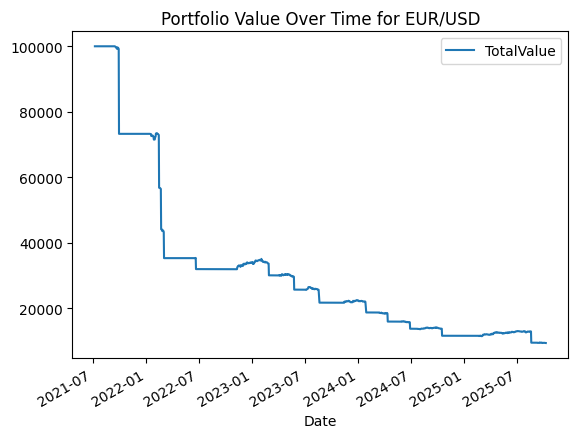

In [1]:
from Backtester.backtest import Backtest
from Strategy.moving_average import MovingAverageCrossover  # example
import pandas as pd

# Fetch data
df = pd.read_csv('/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting/Data/market_data_features.csv')

df['Date.'] = pd.to_datetime(df['Date.'])
df.set_index('Date.', inplace=True)

# Create strategy instance
strategy = MovingAverageCrossover(short_window=20, long_window=50)

# Run backtest
bt = Backtest(df, strategy, ticker='EURUSD=X', initial_capital=100000)
results = bt.run()

# Show outputs
bt.summary()

# Optional: visualize performance
results[['TotalValue']].plot(title='Portfolio Value Over Time for EUR/USD')


Backtest test code for MomentumStrategy Strategy


Initial capital: $100000.00
Final Portfolio Value: $13.74
Total return: -99.99
Total trades Executed: 92
         Date    Ticker Signal  Units     Price       Cost  Remaining  Revenue
87 2025-09-11  EURUSD=X   SELL     32  1.170344        NaN  27.508351     27.0
88 2025-09-12  EURUSD=X    BUY     23  1.173475  27.016910   0.491441      NaN
89 2025-09-26  EURUSD=X   SELL     23  1.166276        NaN  19.491441     19.0
90 2025-09-29  EURUSD=X    BUY     16  1.170823  18.751903   0.739538      NaN
91 2025-10-06  EURUSD=X   SELL     16  1.171248        NaN  13.739538     13.0


<Axes: title={'center': 'Portfolio Value Over Time '}, xlabel='Date'>

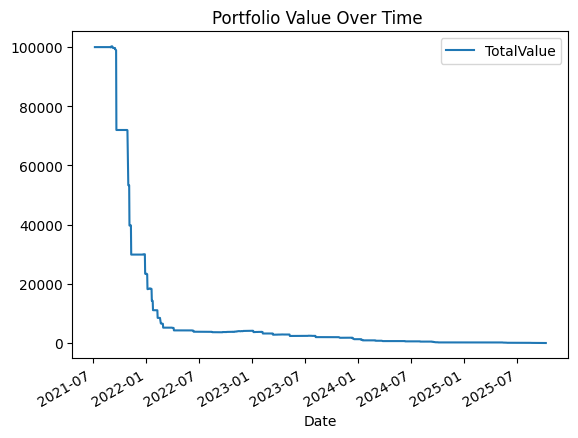

In [1]:
from Backtester.backtest import Backtest
from Strategy.momentum import MomentumStrategy  # example
import pandas as pd

# Fetch data
df = pd.read_csv('/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting/Data/market_data_features.csv')

df['Date.'] = pd.to_datetime(df['Date.'])
df.set_index('Date.', inplace=True)

strategy = MomentumStrategy(lookback=20)
bt = Backtest(df, strategy, ticker='EURUSD=X', initial_capital=100000)
results = bt.run()

bt.summary()

results[['TotalValue']].plot(title='Portfolio Value Over Time ')


Backtest test code for MeanReversion Strategy

Initial capital: $100000.00
Final Portfolio Value: $8368.81
Total return: -91.63
Total trades Executed: 28
         Date    Ticker Signal  Units     Price          Cost     Remaining  \
23 2025-03-05  EURUSD=X   SELL  15547  1.062699           NaN  14644.297943   
24 2025-05-13  EURUSD=X    BUY  13185  1.109558  14644.148424      0.149518   
25 2025-06-13  EURUSD=X   SELL  13185  1.160025           NaN  11377.149518   
26 2025-07-30  EURUSD=X    BUY   9839  1.155095  11376.339803      0.809715   
27 2025-09-09  EURUSD=X   SELL   9839  1.176914           NaN   8368.809715   

    Revenue  
23  14644.0  
24      NaN  
25  11377.0  
26      NaN  
27   8368.0  


<Axes: title={'center': 'Portfolio Value Over Time for EUR/USD '}, xlabel='Date'>

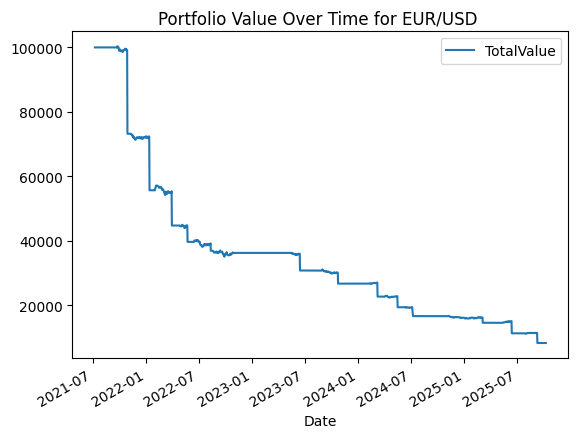

In [2]:
from Backtester.backtest import Backtest
from Strategy.mean_reversion import BollingerMeanReversionStrategy  # example
import pandas as pd

# Fetch data
df = pd.read_csv('/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting/Data/market_data_features.csv')

df['Date.'] = pd.to_datetime(df['Date.'])
df.set_index('Date.', inplace=True)

strategy = BollingerMeanReversionStrategy(window=20,num_std=2)

bt = Backtest(df, strategy, ticker='EURUSD=X', initial_capital=100000)
results = bt.run()

bt.summary()

results[['TotalValue']].plot(title='Portfolio Value Over Time for EUR/USD ')


